<a href="https://colab.research.google.com/github/Hkkay/Spark-/blob/main/PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark 


     |████████████████████████████████| 281.3 MB 37 kB/s 
     |████████████████████████████████| 198 kB 62.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=431ca82ea5cd5aa6f6f5115d84bec6a8bcefd2790e7155b74a954aa9f36bd489
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
import pyspark 
import pandas as pd 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from pyspark.sql import SparkSession
from pyspark.context import SparkContext

In [ ]:
!pyspark --driver-memory 4g --executor-memory 4g --master local[4]

Python 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/12/09 22:15:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 3.2.0
      /_/

Using Python version 3.7.12 (default, Sep 10 2021 00:21:48)
Spark context Web UI available at http://341fe57b3266:4040
Spark context available as 'sc' (master = local[4], app id = local-1639088108395).
SparkSession available as 'spark'.
>>> exti()
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
NameError: name 'exti' is not defin

In [ ]:
sc = SparkContext('local')
spark = SparkSession(sc)


In [ ]:
spark

In [ ]:
df = spark.read.csv('Chicago_Crimes*.csv', inferSchema=True, header=True)
df.show(10)

+----+-------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
| _c0|     ID|Case Number|                Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+----+-------+-----------+--------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
| 879|4786321|   HM399414|01/01/2004 12:01:...|   082XX S COLES AVE|0840|               THEFT|FINANCIAL ID THEF.

In [ ]:
print(df.count())

1424815


In [ ]:
df.columns


['_c0',
 'ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [ ]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: double (nullable = true)
 |-- Ward: double (nullable = true)
 |-- Community Area: double (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: double (nullable = true)
 |-- Y Coordinate: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
df.columns[:]

['_c0',
 'ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [ ]:
crime_type_groups = df.groupby('Primary Type').count()
crime_type_groups.show()

+--------------------+------+
|        Primary Type| count|
+--------------------+------+
|OFFENSE INVOLVING...| 11109|
|            STALKING|   798|
|PUBLIC PEACE VIOL...| 12984|
|           OBSCENITY|   181|
|NON-CRIMINAL (SUB...|     4|
|               ARSON|  2165|
|            GAMBLING|  2212|
|   CRIMINAL TRESPASS| 36171|
|             ASSAULT| 89279|
|      NON - CRIMINAL|    38|
|LIQUOR LAW VIOLATION|  1941|
| MOTOR VEHICLE THEFT| 59254|
|               THEFT|322238|
|             BATTERY|258425|
|             ROBBERY| 55641|
|            HOMICIDE|  2550|
|    PUBLIC INDECENCY|    61|
| CRIM SEXUAL ASSAULT|  6644|
|   HUMAN TRAFFICKING|    27|
|        INTIMIDATION|   643|
+--------------------+------+
only showing top 20 rows



[Text(0, 0.5, 'Primary Type'), Text(0.5, 0, 'Crimes Record Count')]

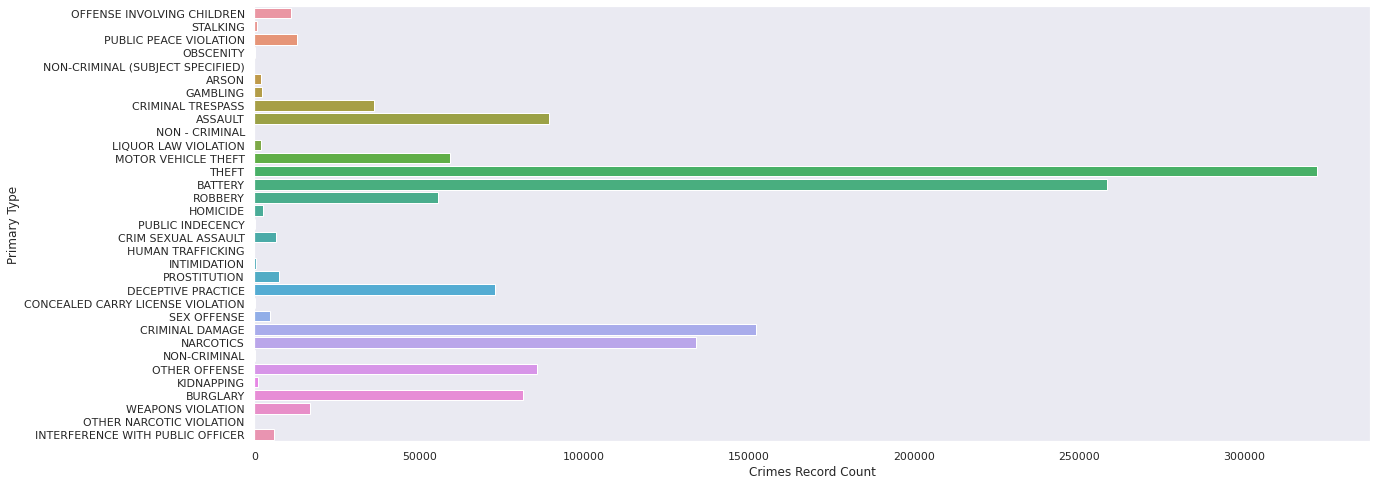

In [ ]:
counts_pddf = pd.DataFrame(crime_type_groups.rdd.map(lambda l: l.asDict()).collect())
plt.rcParams["figure.figsize"] = [20, 8]

sns.set(style="dark")
sns.set_color_codes("bright")

#sns.despine(left=True, bottom=True)
type_graph = sns.barplot(x='count', y='Primary Type', data=counts_pddf)
type_graph.set(ylabel="Primary Type", xlabel="Crimes Record Count")

In [ ]:
crime_type_groups = crime_type_groups.orderBy('count',ascending =False)
crime_type_groups.show()

+--------------------+------+
|        Primary Type| count|
+--------------------+------+
|               THEFT|329460|
|             BATTERY|263700|
|     CRIMINAL DAMAGE|155455|
|           NARCOTICS|135240|
|             ASSAULT| 91289|
|       OTHER OFFENSE| 87874|
|            BURGLARY| 83397|
|  DECEPTIVE PRACTICE| 75495|
| MOTOR VEHICLE THEFT| 61138|
|             ROBBERY| 57313|
|   CRIMINAL TRESPASS| 36912|
|   WEAPONS VIOLATION| 17233|
|PUBLIC PEACE VIOL...| 13122|
|OFFENSE INVOLVING...| 11398|
|        PROSTITUTION|  7633|
| CRIM SEXUAL ASSAULT|  6823|
|INTERFERENCE WITH...|  6195|
|         SEX OFFENSE|  4885|
|            HOMICIDE|  2649|
|               ARSON|  2217|
+--------------------+------+
only showing top 20 rows



In [ ]:
import datetime 
from pyspark.sql.functions import * 

In [ ]:
df = df.withColumn('date_time', to_timestamp('date', 'MM/dd/yyyy hh:mm:ss a'))\
       .withColumn('month', trunc('date_time', 'mon')) #adding a month column to be able to view stats on a monthly basis

In [ ]:
df.select(['date','date_time', 'month'])\
  .show()

+--------------------+-------------------+----------+
|                date|          date_time|     month|
+--------------------+-------------------+----------+
|01/01/2004 12:01:...|2004-01-01 00:01:00|2004-01-01|
|03/01/2003 12:00:...|2003-03-01 00:00:00|2003-03-01|
|06/20/2004 11:00:...|2004-06-20 11:00:00|2004-06-01|
|12/30/2004 08:00:...|2004-12-30 20:00:00|2004-12-01|
|05/01/2003 01:00:...|2003-05-01 01:00:00|2003-05-01|
|08/01/2004 12:01:...|2004-08-01 00:01:00|2004-08-01|
|01/01/2001 11:00:...|2001-01-01 11:00:00|2001-01-01|
|03/15/2003 12:00:...|2003-03-15 00:00:00|2003-03-01|
|09/16/2004 10:00:...|2004-09-16 10:00:00|2004-09-01|
|01/01/2003 12:00:...|2003-01-01 00:00:00|2003-01-01|
|06/05/2003 12:00:...|2003-06-05 00:00:00|2003-06-01|
|11/01/2004 12:01:...|2004-11-01 00:01:00|2004-11-01|
|01/01/2003 12:00:...|2003-01-01 00:00:00|2003-01-01|
|11/01/2004 12:00:...|2004-11-01 00:00:00|2004-11-01|
|11/01/2003 08:00:...|2003-11-01 08:00:00|2003-11-01|
|11/15/2003 09:00:...|2003-1

In [ ]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: double (nullable = true)
 |-- Ward: double (nullable = true)
 |-- Community Area: double (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: double (nullable = true)
 |-- Y Coordinate: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- date_time: timestamp (nullable = true)
 |-- month: date (null

In [ ]:
import datetime
datetime.datetime.strftime(datetime.datetime.now(), '%H')

'23'

In [ ]:
pivot_table = df.groupBy("year").pivot("Primary Type").count().fillna(0)
pivot_table.show()
pivot_table

+----+-----+-------+-------+--------+---------------------------------+-------------------+---------------+-----------------+------------------+-----------------+--------+--------+-----------------+--------------------------------+------------+----------+--------------------+-------------------+---------+--------------+------------+--------------------------------+---------+--------------------------+------------------------+-------------+------------+----------------+----------------------+---------+-------+-----------+--------+------+-----------------+
|year|ARSON|ASSAULT|BATTERY|BURGLARY|CONCEALED CARRY LICENSE VIOLATION|CRIM SEXUAL ASSAULT|CRIMINAL DAMAGE|CRIMINAL TRESPASS|DECEPTIVE PRACTICE|DOMESTIC VIOLENCE|GAMBLING|HOMICIDE|HUMAN TRAFFICKING|INTERFERENCE WITH PUBLIC OFFICER|INTIMIDATION|KIDNAPPING|LIQUOR LAW VIOLATION|MOTOR VEHICLE THEFT|NARCOTICS|NON - CRIMINAL|NON-CRIMINAL|NON-CRIMINAL (SUBJECT SPECIFIED)|OBSCENITY|OFFENSE INVOLVING CHILDREN|OTHER NARCOTIC VIOLATION|OTHER OFFE

DataFrame[year: int, ARSON: bigint, ASSAULT: bigint, BATTERY: bigint, BURGLARY: bigint, CONCEALED CARRY LICENSE VIOLATION: bigint, CRIM SEXUAL ASSAULT: bigint, CRIMINAL DAMAGE: bigint, CRIMINAL TRESPASS: bigint, DECEPTIVE PRACTICE: bigint, DOMESTIC VIOLENCE: bigint, GAMBLING: bigint, HOMICIDE: bigint, HUMAN TRAFFICKING: bigint, INTERFERENCE WITH PUBLIC OFFICER: bigint, INTIMIDATION: bigint, KIDNAPPING: bigint, LIQUOR LAW VIOLATION: bigint, MOTOR VEHICLE THEFT: bigint, NARCOTICS: bigint, NON - CRIMINAL: bigint, NON-CRIMINAL: bigint, NON-CRIMINAL (SUBJECT SPECIFIED): bigint, OBSCENITY: bigint, OFFENSE INVOLVING CHILDREN: bigint, OTHER NARCOTIC VIOLATION: bigint, OTHER OFFENSE: bigint, PROSTITUTION: bigint, PUBLIC INDECENCY: bigint, PUBLIC PEACE VIOLATION: bigint, RITUALISM: bigint, ROBBERY: bigint, SEX OFFENSE: bigint, STALKING: bigint, THEFT: bigint, WEAPONS VIOLATION: bigint]

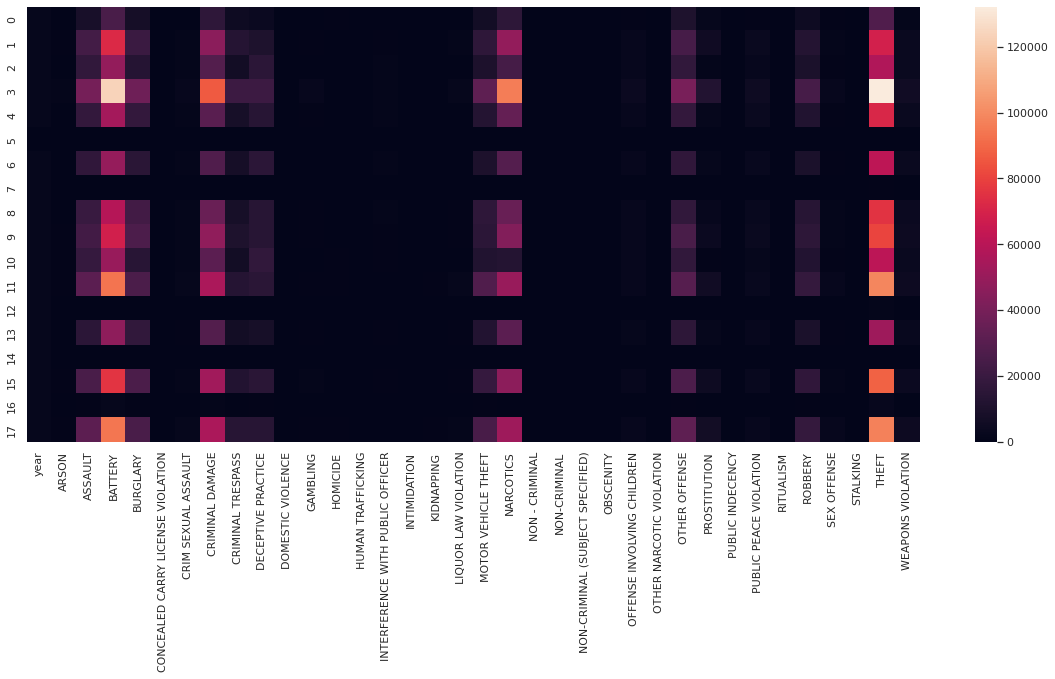

In [ ]:
pivot_table_pd = pivot_table.toPandas()
sns.heatmap(pivot_table_pd)

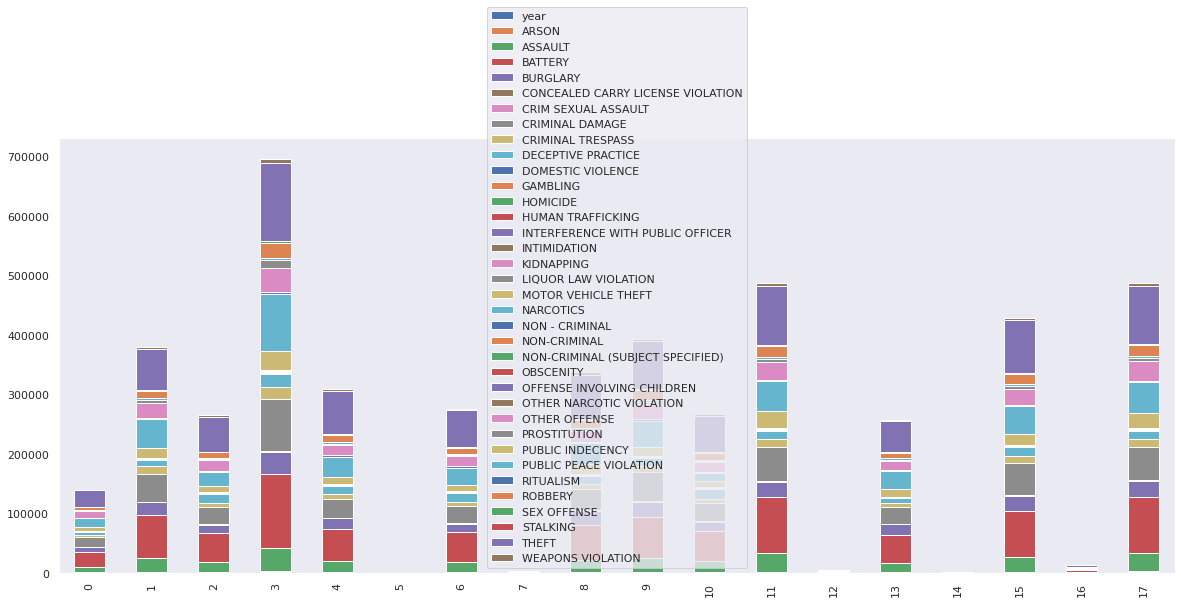

In [ ]:
pivot_table_pd.plot.bar(stacked = True)